![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 15 - Interpretability</center>
### <center> SHAP (SHapley Additive exPlanations) </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/15_Interpretability/MainSHAP.ipynb)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

#### Simple linear regression for intuition:
$$y=7+x_{1}-2x_{2}+3x_{3}-3x_{4}+5.5x_{5}+\epsilon$$

In [2]:
N  = 1000
#-- Generate some zero mean data:
mX = 2 * (np.random.rand(N, 5) - 1/2)

#-- y:
vY = 7 + 1*mX[:,0] - 2*mX[:,1] + 3*mX[:,2] - 3*mX[:,3] + 5.5*mX[:,4] + np.random.randn(N) / 10

#### Fit a linear regression model:

In [3]:
from sklearn.linear_model import LinearRegression

oLS = LinearRegression().fit(mX, vY)
oLS.score(mX, vY)

0.9994667131602093

### SHAP:

In [4]:
import shap
shap.initjs()

#### Create SHAP object:
We use `kmeans` or `sample` to reduce the background data size

In [5]:
# oSHAP = shap.KernelExplainer(oLS.predict, mX)
# oSHAP = shap.KernelExplainer(oLS.predict, shap.kmeans(mX, 50))
oSHAP = shap.KernelExplainer(oLS.predict, shap.sample(mX, 100))

#### Compute SHAP of a single observation `vX`:
$$\boldsymbol{x}^{\star}=\left[\begin{matrix}1\\
1\\
5\\
1\\
1
\end{matrix}\right]$$

In [6]:
vX = np.array([1, 1, 5, 1, 1])

#-- Compute Shapley values for vX:
vShapleValues = oSHAP.shap_values(vX)

#-- Print:
for ii in range(6):
    if ii == 0:
        φ = oSHAP.expected_value
    else:
        φ = vShapleValues[ii-1]
    print(f'φ_{ii} = {φ: 5.5f}')

φ_0 =  6.71761
φ_1 =  1.03313
φ_2 = -1.88365
φ_3 =  15.29779
φ_4 = -3.10705
φ_5 =  5.42737


#### Force plot:

In [7]:
shap.force_plot(oSHAP.expected_value, vShapleValues, feature_names=['x_1', 'x_2', 'x_3', 'x_4', 'x_5'])

#### Multiple observations:

In [8]:
#-- Compute Shapley values for a many instances:
mShapleValues = oSHAP.shap_values(mX)
mShapleValues.shape

  0%|          | 0/1000 [00:00<?, ?it/s]

(1000, 5)

#### Summery plot:

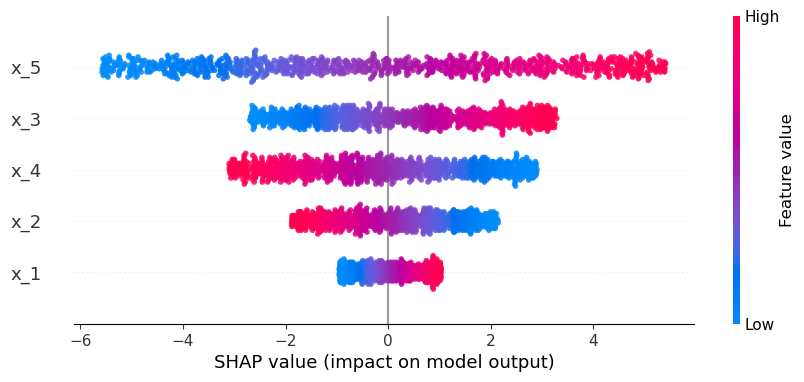

In [9]:
shap.summary_plot(mShapleValues, mX, alpha=.85, plot_size=(10, 4), feature_names=['x_1', 'x_2', 'x_3', 'x_4', 'x_5'])

#### Non-linear model:
$$y=7+x_{1}^2-2x_{2}+\epsilon$$

In [10]:
N  = 1000
#-- Generate some zero mean data:
mX = 6 * (np.random.rand(N, 2) - 1/2)

#-- y:
vY = 7 + 1*mX[:,0]**2 - 2*mX[:,1] + np.random.randn(N) / 10

#### Polyfit regression:

In [11]:
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline      import make_pipeline

oPolyfit = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())
oPolyfit = oPolyfit.fit(mX, vY)
oPolyfit.score(mX, vY)

0.9994950700857219

In [12]:
# oSHAP = shap.KernelExplainer(oPolyfit.predict, mX)
oSHAP = shap.KernelExplainer(oPolyfit.predict, shap.kmeans(mX, 100))

In [13]:
vX = np.array([2, 1])

#-- Compute Shapley values for a single instance:
vShapleValues = oSHAP.shap_values(vX)

#-- Print:
for ii in range(3):
    if ii == 0:
        φ = oSHAP.expected_value
    else:
        φ = vShapleValues[ii-1]
    print(f'φ_{ii} = {φ:+7.3f}')

φ_0 = +10.158
φ_1 =  +1.017
φ_2 =  -2.181


In [14]:
shap.force_plot(oSHAP.expected_value, vShapleValues, feature_names=['x_1', 'x_2'])

In [15]:
#-- Compute Shapley values for a many instances:
mShapleValues = oSHAP.shap_values(mX)
mShapleValues.shape

  0%|          | 0/1000 [00:00<?, ?it/s]

(1000, 2)

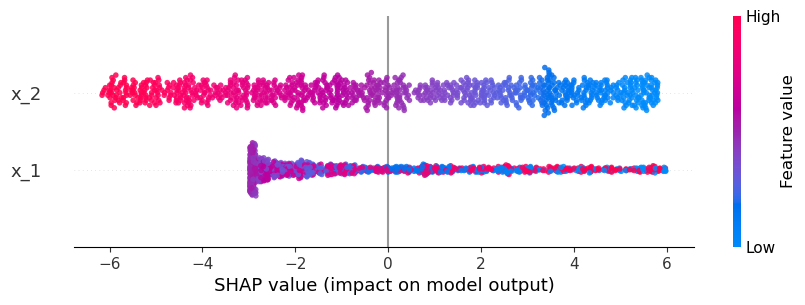

In [16]:
shap.summary_plot(mShapleValues, mX, alpha=.85, plot_size=(10, 3), feature_names=['x_1', 'x_2'])

#### Dependency plot:

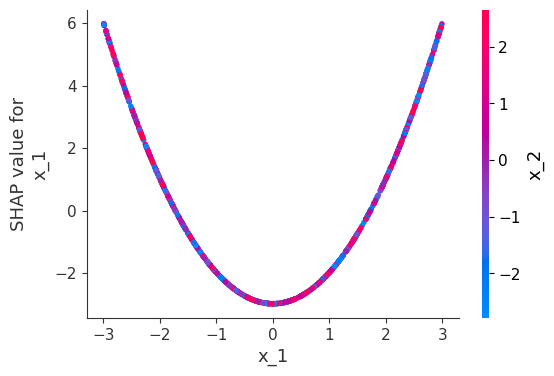

In [17]:
_, ax = plt.subplots(figsize=(6, 4))
shap.dependence_plot(0, mShapleValues, mX, feature_names=['x_1', 'x_2'], ax=ax)

### Classification:

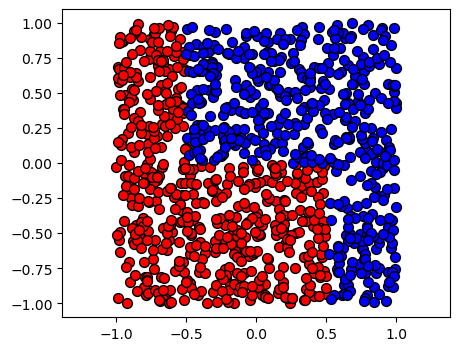

In [18]:
N  = 1000
mX = 2 * np.random.rand(N, 2) - 1
vY = np.zeros(N)
vY[mX[:,0] > .5] = 1
vY[(mX[:,0] > -.5) & (mX[:,1] > 0)] = 1

vIdx0 = vY == 0
vIdx1 = vY == 1

plt.figure (figsize=(5, 4))
plt.scatter(mX[vIdx0,0], mX[vIdx0,1], s=50, c='r', edgecolor='k')
plt.scatter(mX[vIdx1,0], mX[vIdx1,1], s=50, c='b', edgecolor='k')
plt.axis   ('equal')
plt.show   ()

#### Train SVM:

In [19]:
from sklearn.svm import SVC

oSVM = SVC(probability=True, gamma=10).fit(mX, vY)
oSVM.score(mX, vY)

0.993

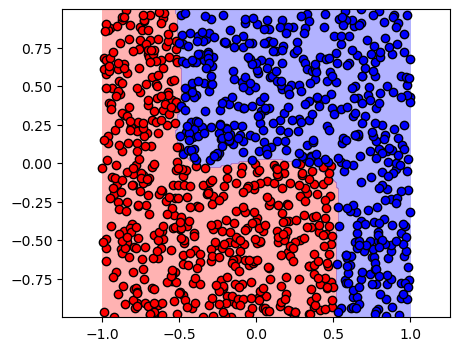

In [20]:
#-- make grid for plot:
v0            = np.linspace(mX[:,0].min(), mX[:,0].max(), 150)
v1            = np.linspace(mX[:,1].min(), mX[:,1].max(), 150)
XX0, XX1      = np.meshgrid(v0, v1)
XX            = np.c_[XX0.ravel(), XX1.ravel()]

#-- Plot classification:
plt.figure(figsize=(5, 4))
Z = oSVM.predict(XX)
Z = Z.reshape(XX0.shape)

plt.contourf(XX0, XX1, Z, colors=['red', 'blue'], alpha=0.3, levels=[0, .5, 1])
plt.scatter (mX[vIdx0,0], mX[vIdx0,1], color='r', edgecolor='k')
plt.scatter (mX[vIdx1,0], mX[vIdx1,1], color='b', edgecolor='k')
plt.axis    ('equal')
plt.show    ()

#### SHAP:

In [21]:
# oSHAP = shap.KernelExplainer(oSVM.predict_proba, mX)
oSHAP = shap.KernelExplainer(oSVM.predict_proba, shap.sample(mX, 100))

In [22]:
mShapValues = oSHAP.shap_values(mX)[0]
mShapValues.shape

  0%|          | 0/1000 [00:00<?, ?it/s]

(1000, 2)

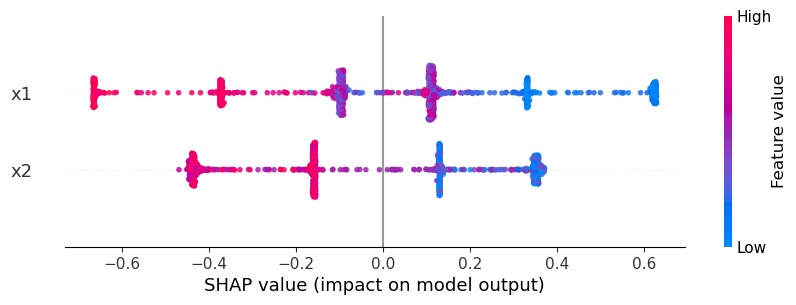

In [23]:
shap.summary_plot(mShapValues, mX, alpha=.85, plot_size=(10, 3), feature_names=['x1', 'x2'])

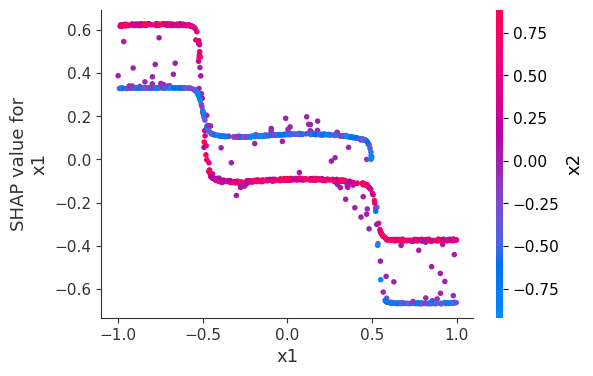

In [24]:
_, ax = plt.subplots(figsize=(6, 4))
shap.dependence_plot(0, mShapValues, mX, feature_names=['x1', 'x2'], ax=ax)

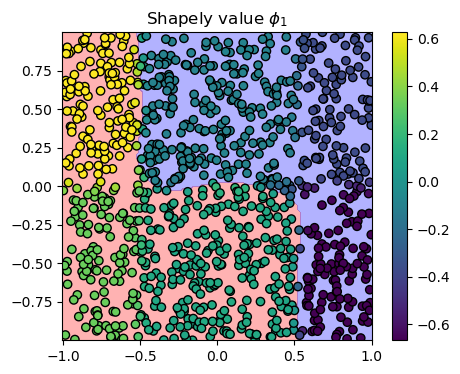

In [25]:
#-- Plot classification:
plt.figure  (figsize=(5, 4))
plt.contourf(XX0, XX1, Z, colors=['red', 'blue'], alpha=0.3, levels=[0, .5, 1])
plt.scatter (mX[:,0], mX[:,1], c=mShapValues[:,0], edgecolor='k')
plt.title   ('Shapely value $\phi_1$')
plt.axis    ('equal')
plt.colorbar()
plt.show    ()

### TreeSHAP

#### Load and clean the Titanic data:

In [26]:
from sklearn.datasets import fetch_openml

lClasses          = ['Died', 'Survived']
dData, vY         = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
dData['Survived'] = vY
dData.drop(columns=['name', 'ticket', 'cabin', 'boat', 'home.dest', 'body'], inplace=True)

dNaNs = {
    'embarked' : dData['embarked'].mode()[0],
    'age'      : dData['age']     .median(),
    'fare'     : dData['fare']    .median(),
}
dData.fillna(value=dNaNs, inplace=True)

dData     = pd.get_dummies(dData, drop_first=True)
mX        = dData.drop(columns=['Survived_1']).values
vY        = dData['Survived_1'].values
lFeatures = list(dData.columns)[:-1]

dData

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,Survived_1
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,1
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,1
2,1.0,2.0000,1.0,2.0,151.5500,0,0,1,0
3,1.0,30.0000,1.0,2.0,151.5500,1,0,1,0
4,1.0,25.0000,1.0,2.0,151.5500,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1304,3.0,14.5000,1.0,0.0,14.4542,0,0,0,0
1305,3.0,28.0000,1.0,0.0,14.4542,0,0,0,0
1306,3.0,26.5000,0.0,0.0,7.2250,1,0,0,0
1307,3.0,27.0000,0.0,0.0,7.2250,1,0,0,0


In [27]:
from sklearn.ensemble import RandomForestClassifier

oRF = RandomForestClassifier(oob_score=True).fit(mX, vY)
oRF.oob_score_

0.7906799083269671

#### TreeSHAP is much faster
We don't need to sample our background data.  
Use `check_additivity=False` if you get an error.

In [28]:
oSHAP         = shap.TreeExplainer(oRF, mX)
mShapleValues = oSHAP.shap_values(mX, check_additivity=False)[0]
mShapleValues.shape

 97%|=================== | 2533/2618 [00:28<00:00]       

(1309, 8)

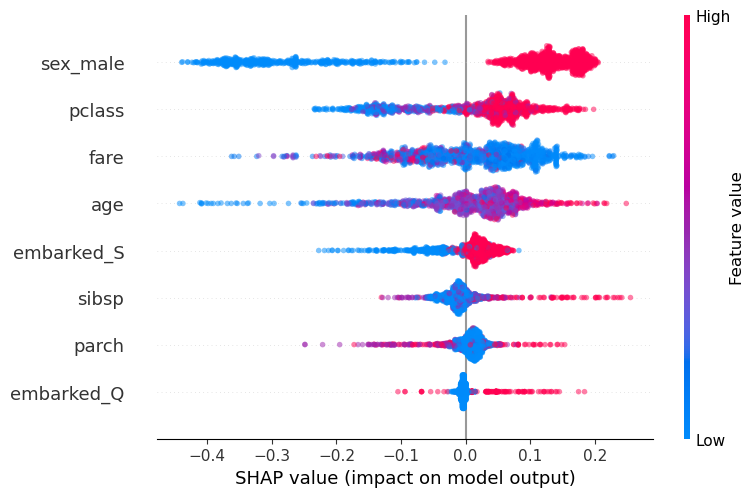

In [29]:
shap.summary_plot(mShapleValues, mX, feature_names=lFeatures, alpha=.5, plot_size=.5)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


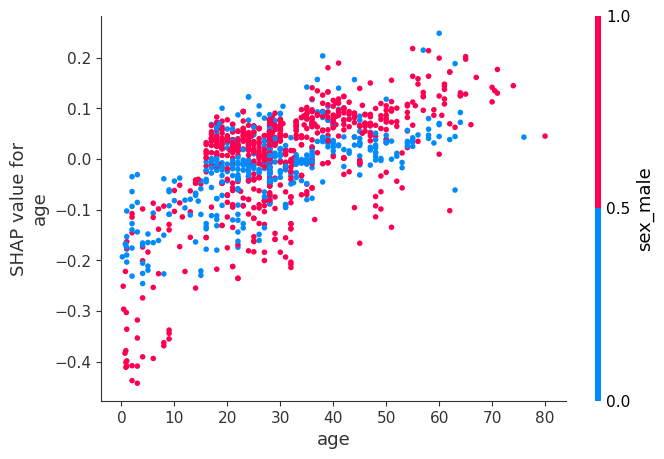

In [30]:
shap.dependence_plot('age', mShapleValues, mX, feature_names=lFeatures, x_jitter=0)

### Exercise
* Classfication:
    * Train a model on the heart data (either tree-based or not).
    * Apply SHAP and plot the summary plot (and also some dependency plots).
* Regression:
    * Train a model on insurance data (either tree-based or not).
    * Apply SHAP and plot the summary plot (and also some dependency plots).
    

In [31]:
???

Object `?` not found.
